In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
import sys
import time
import sklearn
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for model in mpl, np, pd, sklearn, keras:
    print(model.__name__, model.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.19.0
pandas 1.0.5
sklearn 0.23.1
tensorflow_core.keras 2.2.4-tf


In [2]:
layer2 = keras.layers.Dense(300)
layer1 = keras.layers.Dense(100,input_shape=[None,5])
layer1(tf.zeros([10, 5]))
#layer1.variables #变量
# y = w * x + b 
#layer1.trainable_variables #可训练变量
#help(layer1) # 查看方法

<tf.Tensor: id=29, shape=(10, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 

In [3]:
# 回归问题
# 加利福利亚
from sklearn.datasets import fetch_california_housing
#加载数据
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
import pprint
#展示数据 查看规律
pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [5]:
from sklearn.model_selection import train_test_split

#数据切割 训练集 验证集 测试
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7, test_size=0.25)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [6]:
from sklearn.preprocessing import StandardScaler

#数据归一化
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled =  scaler.transform(x_test)

In [7]:
# 自定义DenseLayer    子类继承
class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self,units,activation=None,**kwargs):
        self.units = units
        self.activation =  keras.layers.Activation(activation)
        super(CustomizedDenseLayer,self).__init__()
        
    def build(self,input_shape):
        """构建所需要的参数"""
        # x * w + b. input_shape:[None, a]  w:[a,b]  output_shape: [None, b]  矩阵相乘推算出 w:[a,b]
        self.kernel = self.add_weight(name='kernel',
                                      shape=(input_shape[1],self.units),
                                      initializer='uniform',
                                      trainable = True)
        self.bias = self.add_weight(name='bias',
                                    shape=(self.units,),
                                    initializer = 'zeros',
                                    trainable = True)
        super(CustomizedDenseLayer,self).build(input_shape)
    
    def call(self,x):
        """完成正向计算"""
        return self.activation(x @ self.kernel + self.bias)
        
    

In [8]:
# lambda
customized_softplus = keras.layers.Lambda(lambda x : tf.nn.softplus(x))
print(customized_softplus([-10.,-5.,0.,5.,10.]))

tf.Tensor([4.5417706e-05 6.7153489e-03 6.9314718e-01 5.0067153e+00 1.0000046e+01], shape=(5,), dtype=float32)


In [9]:
#model构建
"""model = keras.models.Sequential([
    keras.layers.Dense(50, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])"""
model = keras.models.Sequential([
    CustomizedDenseLayer(50,activation='relu',input_shape=x_train.shape[1:]),
    CustomizedDenseLayer(30,activation='relu'),
    CustomizedDenseLayer(1),
    customized_softplus,
    # keras.layers.Dense(1, activation="softplus"),
    # keras.layers.Dense(1), keras.layers.Activation('softplus'),
])

#model.summary()
# 自定义  损失函数
def custom_mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

model.compile(loss=custom_mse, optimizer='sgd', metrics=['accuracy','mean_squared_error'])

callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-15)]

In [10]:
history = model.fit(x_train_scaled,y_train, validation_data = (x_valid_scaled,y_valid), epochs=100, callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 3s 224us/sample - loss: 1.5895 - accuracy: 0.0031 - mean_squared_error: 1.5896 - val_loss: 1.2540 - val_accuracy: 0.0023 - val_mean_squared_error: 1.2540
Epoch 2/100
11610/11610 [==============================] - 1s 77us/sample - loss: 0.7839 - accuracy: 0.0031 - mean_squared_error: 0.7839 - val_loss: 0.6667 - val_accuracy: 0.0023 - val_mean_squared_error: 0.6667
Epoch 3/100
11610/11610 [==============================] - 1s 83us/sample - loss: 0.5747 - accuracy: 0.0031 - mean_squared_error: 0.5747 - val_loss: 0.5646 - val_accuracy: 0.0023 - val_mean_squared_error: 0.5646
Epoch 4/100
11610/11610 [==============================] - 1s 82us/sample - loss: 0.4966 - accuracy: 0.0031 - mean_squared_error: 0.4966 - val_loss: 0.4967 - val_accuracy: 0.0023 - val_mean_squared_error: 0.4967
Epoch 5/100
11610/11610 [==============================] - 1s 84us/sample - loss: 0.4568 - accuracy: 0

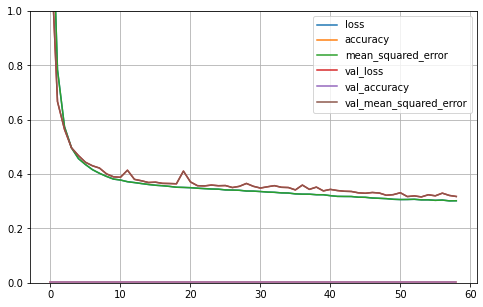

In [11]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [12]:
model.evaluate(x_test_scaled, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3227836700834969, 0.0032945736, 0.3227836]